In [5]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pylab 
import scipy.stats as stats
from matplotlib.patches import Patch
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import gdown
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

In [6]:
data = pd.read_csv('Kaggle_Training_Dataset_v2.csv') 
df = data.copy()

In [7]:
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
#print("Number of categorical featues including Product id and target variable : " , data.select_dtypes(exclude=['int', 'float']).shape[1])
print('Features : ', data.columns.values)

Number of data points :  1687861
Number of features :  23
Features :  ['sku' 'national_inv' 'lead_time' 'in_transit_qty' 'forecast_3_month'
 'forecast_6_month' 'forecast_9_month' 'sales_1_month' 'sales_3_month'
 'sales_6_month' 'sales_9_month' 'min_bank' 'potential_issue'
 'pieces_past_due' 'perf_6_month_avg' 'perf_12_month_avg' 'local_bo_qty'
 'deck_risk' 'oe_constraint' 'ppap_risk' 'stop_auto_buy' 'rev_stop'
 'went_on_backorder']


In [8]:
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
sku                  1687861 non-null object
national_inv         1687860 non-null float64
lead_time            1586967 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null object
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null object
oe_constraint        1687860 non-null object
ppap_risk        

In [10]:
data.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [11]:
#Dropping first column since it contains unique id of the product
data.drop(['sku'], axis = 1,inplace=True)

# Dropping last row as it contains NaN values
data.drop(data.tail(1).index,inplace=True)

In [12]:
#Checking ratio of Output Variables
data.went_on_backorder.value_counts()

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

99.33% belong to the class "Yes" and remaining 0.669% belong to the class "No" . Hence the dataset is highly imbalanced with ratio of 148:1

# Pair plots of features

In [13]:
df.drop(data.tail(1).index,inplace=True) 
df.drop(['sku'], axis = 1,inplace=True)
df= data.copy()
cat = data.select_dtypes(include = ['object']).columns
num = data.select_dtypes(exclude = ['object']).columns
for col in num:
  if (((df[col].dtype)=='float64')):
    percentiles = df[col].quantile([0.05,0.9]).values
    df[col][df[col] < percentiles[0]] = percentiles[0]
    df[col][df[col] > percentiles[1]] = percentiles[1]

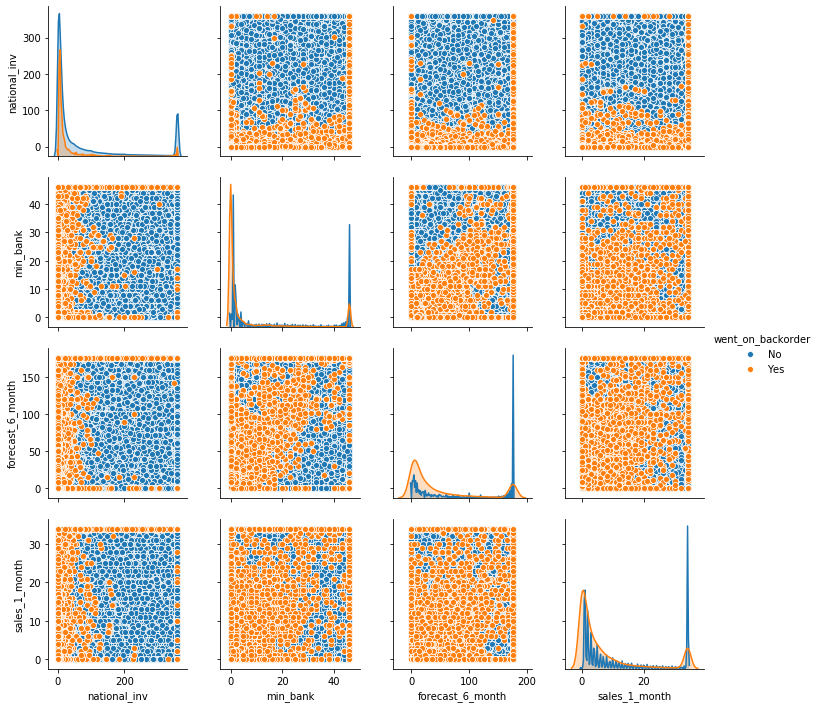

In [14]:
sns.pairplot(df[['national_inv','min_bank','forecast_6_month','sales_1_month','went_on_backorder']],hue = 'went_on_backorder')

1.For lower national_inv as min_bank increase there are higher chances of items going to backorder.

2.For low sales_1_month values and higher forecast_6_month it can be seen that more items went to backorder.

3.For higher nationa_inv>100 there are very less chances of items going into backorder.

# Plotting Barplots for Categorical features

1.rev_stop

In [15]:
df= data.copy()
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


went_on_backorder        No       Yes
rev_stop                             
No                 0.993306  0.006694
Yes                1.000000       NaN


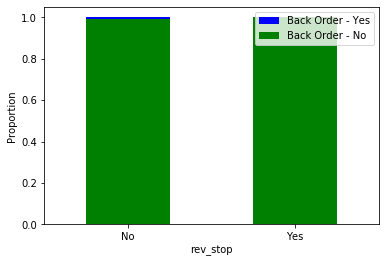

In [16]:
df= pd.read_csv('Kaggle_Training_Dataset_v2.csv')
counts_df = df.groupby(["rev_stop", "went_on_backorder"])["sku"].count().unstack()

proportions_df = counts_df.T.div(counts_df.T.sum()).T

print(proportions_df)
fig, ax = plt.subplots()

proportions_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("rev_stop")
ax.set_xticklabels(['No','Yes'], rotation=0)
ax.set_ylabel("Proportion")

color_patches = [
    Patch(facecolor="blue", label="Back Order - Yes"),
    Patch(facecolor="green", label="Back Order - No")
]
ax.legend(handles=color_patches)

1.No item went to backorder if rev_stop flag is set to Yes

2.For rev_stop = 'No' the class ratio is 99.33 % : 0.667%


2.potential_issue

went_on_backorder        No       Yes
potential_issue                      
No                 0.993336  0.006664
Yes                0.943771  0.056229


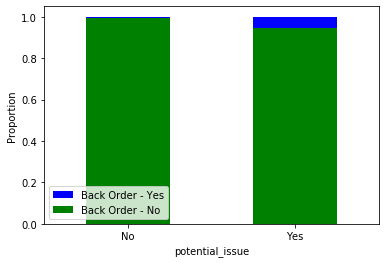

In [17]:
counts_df = df.groupby(["potential_issue", "went_on_backorder"])["sku"].count().unstack()

proportions_df = counts_df.T.div(counts_df.T.sum()).T

print(proportions_df)
fig, ax = plt.subplots()

proportions_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("potential_issue")
ax.set_xticklabels(['No','Yes'], rotation=0)
ax.set_ylabel("Proportion")

color_patches = [
    Patch(facecolor="blue", label="Back Order - Yes"),
    Patch(facecolor="green", label="Back Order - No")
]
ax.legend(handles=color_patches)

If potential_issue flag is 'Yes' then there is 9 times more chance of item going to back order when compared to if flag set to 'No'

3.oe_constraint

went_on_backorder        No       Yes
oe_constraint                        
No                 0.993313  0.006687
Yes                0.967347  0.032653


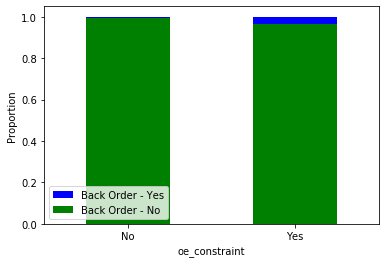

In [18]:
counts_df = df.groupby(["oe_constraint", "went_on_backorder"])["sku"].count().unstack()

proportions_df = counts_df.T.div(counts_df.T.sum()).T

print(proportions_df)
fig, ax = plt.subplots()

proportions_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("oe_constraint")
ax.set_xticklabels(['No','Yes'], rotation=0)
ax.set_ylabel("Proportion")

color_patches = [
    Patch(facecolor="blue", label="Back Order - Yes"),
    Patch(facecolor="green", label="Back Order - No")
]
ax.legend(handles=color_patches)

If oe_cosntraint flag is set to Yes then there is 5 times higher chance of item going to backorder when compared to flag set to No

4.deck_risk



went_on_backorder        No       Yes
deck_risk                            
No                 0.992789  0.007211
Yes                0.995055  0.004945


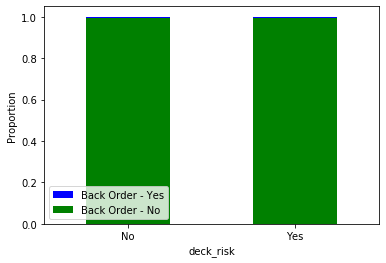

In [19]:
counts_df = df.groupby(["deck_risk", "went_on_backorder"])["sku"].count().unstack()

proportions_df = counts_df.T.div(counts_df.T.sum()).T

print(proportions_df)
fig, ax = plt.subplots()

proportions_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("deck_risk")
ax.set_xticklabels(['No','Yes'], rotation=0)
ax.set_ylabel("Proportion")

color_patches = [
    Patch(facecolor="blue", label="Back Order - Yes"),
    Patch(facecolor="green", label="Back Order - No")
]
ax.legend(handles=color_patches)

The flag dec_risk is not very useful as proportion of postive classes are almost equally disitributed between both flag values of deck_risk

5.ppap_risk

went_on_backorder        No       Yes
ppap_risk                            
No                 0.993576  0.006424
Yes                0.991370  0.008630


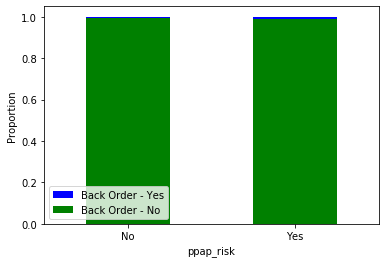

In [20]:
counts_df = df.groupby(["ppap_risk", "went_on_backorder"])["sku"].count().unstack()

proportions_df = counts_df.T.div(counts_df.T.sum()).T

print(proportions_df)
fig, ax = plt.subplots()

proportions_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("ppap_risk")
ax.set_xticklabels(['No','Yes'], rotation=0)
ax.set_ylabel("Proportion")

color_patches = [
    Patch(facecolor="blue", label="Back Order - Yes"),
    Patch(facecolor="green", label="Back Order - No")
]
ax.legend(handles=color_patches)

The flag dec_risk is not very useful as proportion of postive classes are almost equally disitributed between both flag values of deck_risk

6.stop_auto_buy

went_on_backorder        No       Yes
stop_auto_buy                        
No                 0.992290  0.007710
Yes                0.993348  0.006652


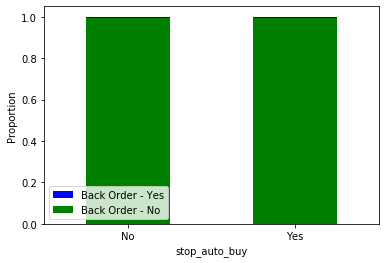

In [21]:
counts_df = df.groupby(["stop_auto_buy", "went_on_backorder"])["sku"].count().unstack()

proportions_df = counts_df.T.div(counts_df.T.sum()).T

print(proportions_df)
fig, ax = plt.subplots()

proportions_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("stop_auto_buy")
ax.set_xticklabels(['No','Yes'], rotation=0)
ax.set_ylabel("Proportion")

color_patches = [
    Patch(facecolor="blue", label="Back Order - Yes"),
    Patch(facecolor="green", label="Back Order - No")
]
ax.legend(handles=color_patches)

The flag stop_auto_buy is not very useful as proportion of postive classes are almost equally disitributed between both flag values of deck_risk

# Correlation Matrix

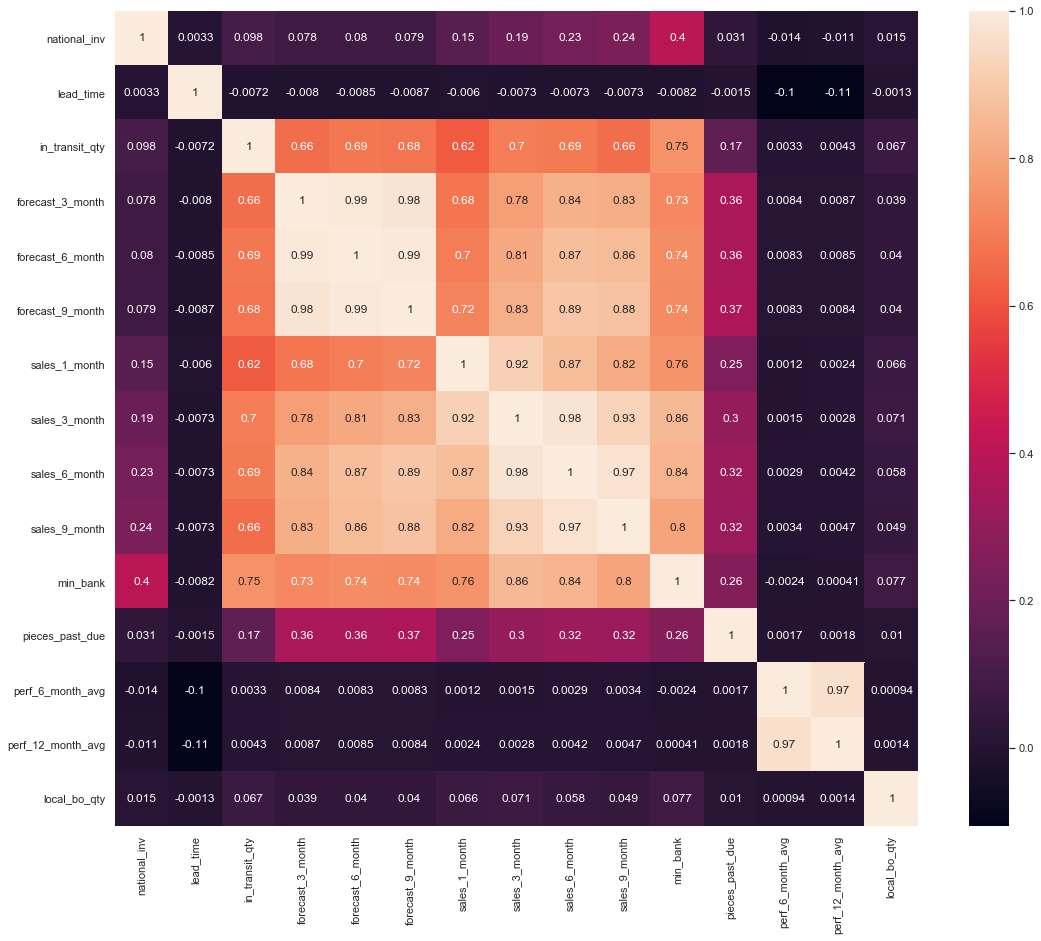

In [22]:
cor = data.corr()
sns.set(rc={'figure.figsize':(18,15)})
sns.heatmap(cor, 
        xticklabels=cor.columns,
        yticklabels=cor.columns,annot = True)

1.Forecast_3_month , forecast_6_month and forecast_9_month are very strogly correlated with each other to a degree of 0.99

2.sales_1_month, sales_3_month, sales_6_month and sales_9_month are strongly correlated with each other

3.forecast and sale columns are correlated with each other with a minimum degree . It is obvious that when the sales for a certain products is high in the past sales the forecast for the same in the coming months will be higher and viceversa.

4.perf_6_month_avg and perf_12_month_avg are very highly correlated with each other.

5.min_bank ( minimum amount of stock recommended ) is highly correlated with sales and forecast columns as stock in inventory is directly proportional to sales.

6.in_transit_qty is highly correlated with sales, forecast and min_bank columns. This is obvious because high sales of a product => more of that product in transport for inventory replenishing high sales of a product => high forecast

7.pieces_past_due is meekly correlated with sales and forecast columns national_inv is meekly correlated with min_bank and weekly correlated with sale columns.

8.As many features are correlated the linear models like logistic regression, Linear SVM and other linear models may not perform well as the coeffiecients of separating plane change By checking VIF value between the correlated features we can remove redundant features if needed or using PCA we can reduce dimensions if feature importance of model is not important

Important conclusions from EDA:

1.Dataset is highly imbalanced should be handled.

2.Almost all numerical features have outliers and are in range <0th quantile value and >90th quantile value

3.The sales , performance and forecast columns have distributions sames as others beloging to same group and are also highly correlated , so for appplying linear models only one from each group can be selected.( selecting all also won't deteroriate model performance)

4.As seen from barplots except stop_auto_buy and deck_risk remaining categorical features are useful for classification.

5.Missing values in lead_time and incorrect value(-99.0) in two performance feature columns should be handled.

# Preprocessing data

### Label encoding categorical variables


In [23]:
cat = data.select_dtypes(include = ['object']).columns
for col in cat:
    data[col].replace({'No': 0, 'Yes': 1}, inplace=True)
    data[col] = data[col].astype(int)

In [24]:
data.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0


In [25]:
#Replacing -99.0 in performance columns with nan for imputing
data.perf_12_month_avg.replace({-99.0 : np.nan}, inplace = True)
data.perf_6_month_avg.replace({-99.0 : np.nan}, inplace = True)

In [26]:
#List of columns having right skewed data
skewed_right = ['national_inv' , 'in_transit_qty' , 'forecast_3_month','forecast_6_month','forecast_9_month' , 'sales_1_month','sales_3_month','sales_6_month','sales_9_month' , 'min_bank','pieces_past_due','local_bo_qty']

# Feature Engineering

### Train and Test split

In [27]:
data_y = data['went_on_backorder']
X_train, X_test, y_train, y_test = train_test_split(data.drop(['went_on_backorder'], axis=1), data_y , random_state = 42 , stratify=data_y,test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,random_state = 42 ,stratify=y_train,test_size=0.10)

### Imputing missing values using a model IterativeImputer

In [28]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)
X_cv = imp.transform(X_cv)
# Copying data to try and apply log transform 
X_train_log, X_cv_log,X_test_log, y_train_log, y_cv_log , y_test_log = X_train, X_cv,X_test, y_train, y_cv , y_test


### Applying Robust scaler for scaling data

In [29]:
transformer = RobustScaler().fit(X_train)
X_train = transformer.transform(X_train)
X_cv = transformer.transform(X_cv)
X_test = transformer.transform(X_test)

Key takeaways after EDA & Feature Engieering

1.The problem we are solving is binary classification with very high data imbalance with positive class being the minority.
Data consists of both Categorical features and numerical features.

2.The categorical features consists of different flags with Yes or No values.

3.Missing values are present in Lead time column and -99.0 an unusual value in performance columns in which the remaining values are b/w 0 and 1

4.Almost all the numerical columns had extreme skewedness (on positive side) indicating them as outliers 

5.As part of preprocesing and feature engineering data , dropped the first columns (Sku) which contains product ids unique for each row and also dropped the last row whch contains nan values.

6.One hot encoded target variable and dependent variable with No as 0 and Yes as 1

7.Replaced -99.0 in performance columns with Nan for imputation.

8.Divided the data into tran test and CV sets.

9.Fitted iterativeimputer on train data imputed nan values in train , test and CV sets.



# Machine learning models

## 1.Random Forest 

In [30]:
model = RandomForestClassifier(class_weight = "balanced_subsample" , n_jobs = -1)
parameters = {'n_estimators' : [10,50,100] , 'max_depth' : [1,3,5]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc' )
gs = clf.fit(X_train, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

Best Params :  {'max_depth': 5, 'n_estimators': 100}
Best Score :  0.9264763800124254


In [31]:
model = RandomForestClassifier(n_estimators = gs.best_params_['n_estimators'],max_depth =gs.best_params_['max_depth'],class_weight = "balanced_subsample", n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=5,
                       n_jobs=-1)

In [32]:
print("The ROC-AUC Score obtained on CV set is : " , roc_auc_score(y_cv, model.predict(X_cv)))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv),average = 'macro'))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv),average = None))

The ROC-AUC Score obtained on CV set is :  0.8367348802399633
The Macro F1-Score obtained on CV set is :  0.48330348397495865
The F1 scores of each class on CV set are :  [0.90503627 0.0615707 ]


In [34]:
def evaluate_model(model,X,y_true):

  """
  This function takes trained model , X(input) , y_true(true label) as input and 
  evaluates model on different metrics
  """
  th = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
  pred = model.predict_proba(X)[:,1]
  scores = []
  tpr = []
  fpr = []

  for i in th:
    pred_labels =[]
    for j in pred:
      if j>=i:
        pred_labels.append(1)
      else:
        pred_labels.append(0)
    scores.append([recall_score(y_true,pred_labels,pos_label=1),precision_score(y_true,pred_labels,pos_label=1)])

    pred_labels = np.array(pred_labels)

    fp = np.sum((pred_labels == 1) & (y_true == 0))
    tp = np.sum((pred_labels == 1) & (y_true == 1))
    fn = np.sum((pred_labels == 0) & (y_true == 1))
    tn = np.sum((pred_labels == 0) & (y_true == 0))
    
    fpr.append(fp / (fp + tn))
    tpr.append(tp / (tp + fn))
  f1score = f1_score(y_true, model.predict(X),average = None)
  print("The F1 scores of each class and Macro F1 score are : " , f1score[0] ,f1score[1] , (f1score[0]+f1score[1])/2)

  xx = [X[0] for X in scores]
  yy = [Y[1] for Y in scores]
  fig = plt.figure(figsize=(6,8))

  ax1 = fig.add_subplot(311)
  ax1.plot(xx,yy,label = 'AUC PR curve'+str(np.round(auc(xx,yy),3)))

  ax1.set_title("Precision - Recall curve")
  ax1.set_xlabel("Recall")
  ax1.set_ylabel("Precision")
  ax1.legend()

  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.9)

  ax2 = fig.add_subplot(312)
  ax2.plot(fpr,tpr,label = "Model ROC AUC on test data : "+str(np.round(auc(fpr,tpr),3)))
  ax2.plot([0, 1], ls="--",label='No Skill')
  ax2.set_title("ROC-AUC curve")
  ax2.set_xlabel("FPR")
  ax2.set_ylabel("TPR")
  ax2.legend()
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.9)

The F1 scores of each class and Macro F1 score are :  0.9040836017586279 0.061800354513661546 0.4829419781361447


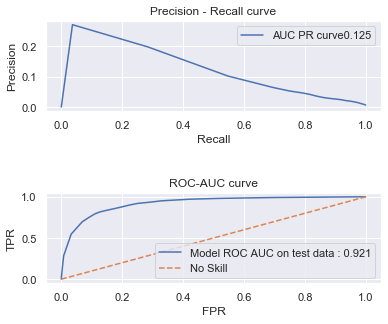

In [35]:
evaluate_model(model,X_test,y_test)


## 2.XG Boost

In [38]:
model = XGBClassifier(nthread=-1)
parameters = {'n_estimators' : [10,20,30]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc' )
gs = clf.fit(X_train, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

Best Params :  {'n_estimators': 30}
Best Score :  0.8972965764325762


In [39]:
model = XGBClassifier(n_estimators = gs.best_params_['n_estimators'],nthread=-1)
model.fit(X_train, y_train)

XGBClassifier(n_estimators=30, nthread=-1)

In [40]:
print("The ROC-AUC Score obtained on CV set is : " , roc_auc_score(y_cv, model.predict(X_cv)))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv),average = 'macro'))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv),average = None))

The ROC-AUC Score obtained on CV set is :  0.5
The Macro F1-Score obtained on CV set is :  0.4983225279114265
The F1 scores of each class on CV set are :  [0.99664506 0.        ]


The F1 scores of each class and Macro F1 score are :  0.9966428141510065 0.0 0.49832140707550326


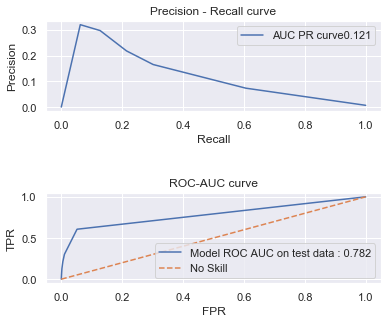

In [41]:
evaluate_model(model,X_test,y_test)